Outliers are data points that differ significantly from other observations in a dataset. They can arise due to measurement errors, data entry mistakes, or genuinely rare events. Outliers can sometimes distort statistical analyses and degrade the performance of certain machine learning models (especially those sensitive to variance or distance, like `linear regression`, `K-Means`, or `StandardScaler`).

This section covers methods for identifying outliers and common strategies for handling them.

## Handling Outliers in Python

This document covers:

* **Concept:** Defines outliers and why handling them might be necessary.
* **Identification:** Demonstrates using visualization (box plots, histograms) and statistical methods (`Z-score`, `IQR`) to detect potential outliers.
* **Handling Strategies:** Explains and provides examples for:
    * Removal: Deleting outlier rows.
    * Transformation: Using `log transform` to reduce skewness and outlier impact.
    * Capping/Winsorizing: Limiting extreme values using percentiles (`.clip`).
    * Mentions using Robust Scalers/Algorithms and Treating as Missing Data as alternative approaches.
* **Considerations:** Emphasizes investigating the cause of outliers and choosing appropriate methods based on context.

---

Handling outliers requires careful consideration, as inappropriate treatment can be as detrimental as ignoring them.

--- Original Data ---
    FeatureA   FeatureB    FeatureC
0  54.967142  71.692585   25.323370
1  48.617357  91.587094    3.066846
2  56.476885  93.145710   28.635921
3  65.230299  83.954455  138.317092
4  47.658466  96.774286    4.527618

Original Data Description:
         FeatureA    FeatureB    FeatureC
count  100.000000  100.000000  100.000000
mean    50.484994  102.182007   26.552345
std     17.622311   43.260912   24.771022
min     23.802549  -60.000000    0.434942
25%     43.990943   83.886790    8.615094
50%     49.061708  102.728323   21.851797
75%     55.008525  112.667778   36.329546
max    200.000000  350.000000  138.317092
------------------------------
--- Identifying Outliers ---

--- a) Visualization ---


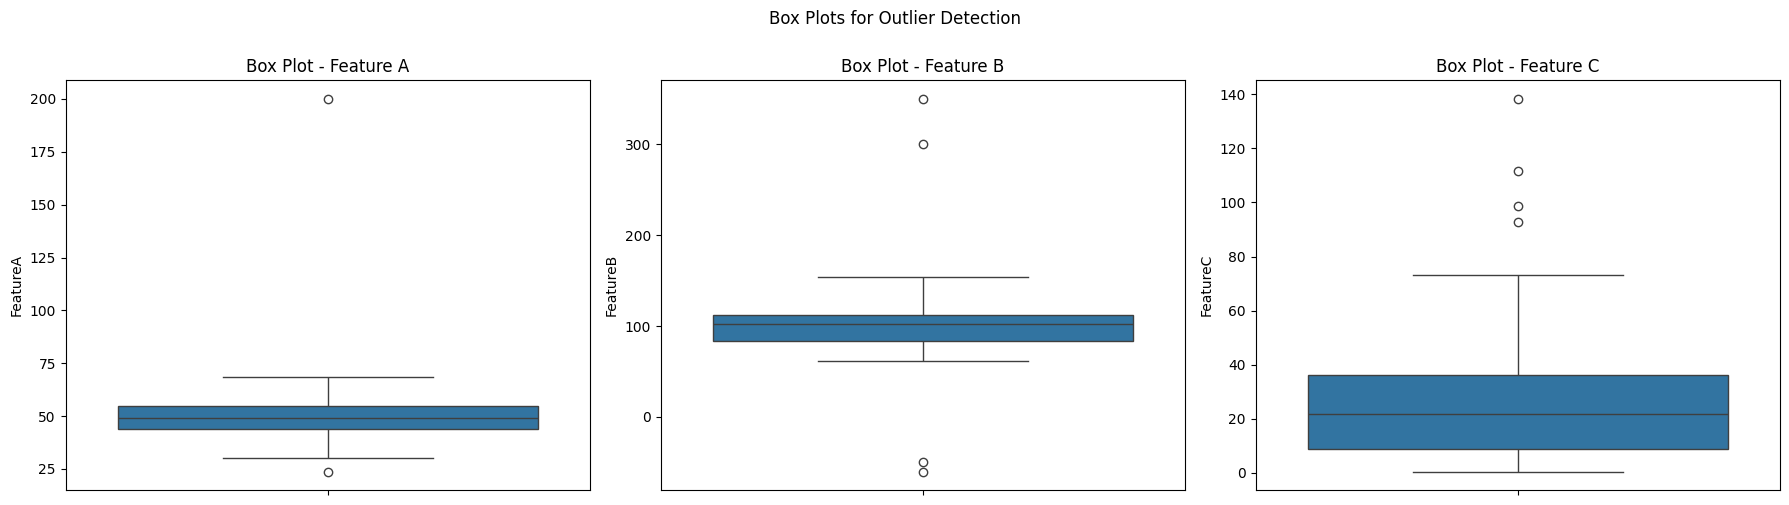

Generated Box Plots (points outside whiskers are potential outliers).


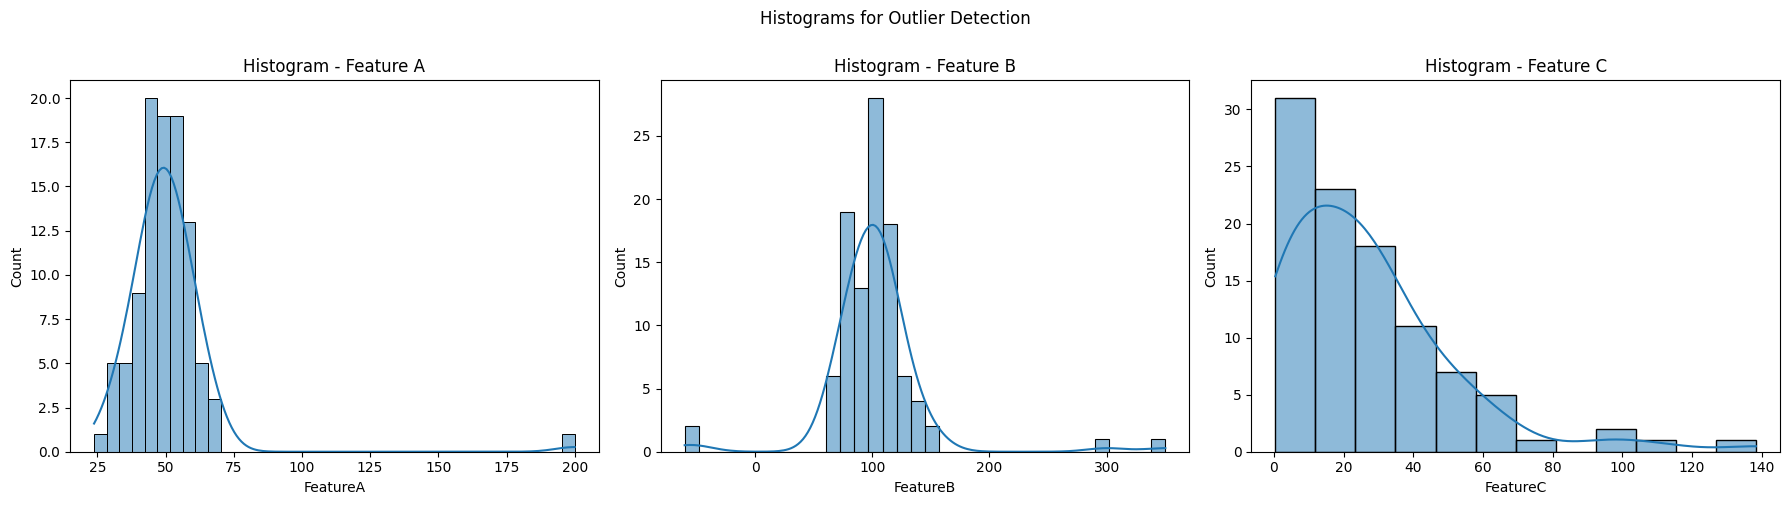

Generated Histograms.
--------------------

--- b) Statistical Methods ---
Using Z-Score threshold: 3

Outliers in FeatureB based on Z-Score > 3:
     FeatureB  Z_Score_B
95     300.0   4.572673
96     350.0   5.728451
97     -50.0  -3.517772
98     -60.0  -3.748927

Using IQR Method (1.5 * IQR rule)
FeatureB - Q1: 83.89, Q3: 112.67, IQR: 28.78
FeatureB - Lower Bound: 40.72, Upper Bound: 155.84

Outliers in FeatureB based on IQR method:
     FeatureB
95     300.0
96     350.0
97     -50.0
98     -60.0
------------------------------
--- Handling Strategies ---

--- a) Removal ---
Shape before removing FeatureB outliers: (100, 3)
Shape after removing FeatureB outliers: (96, 3)

--- b) Transformation (Log) ---


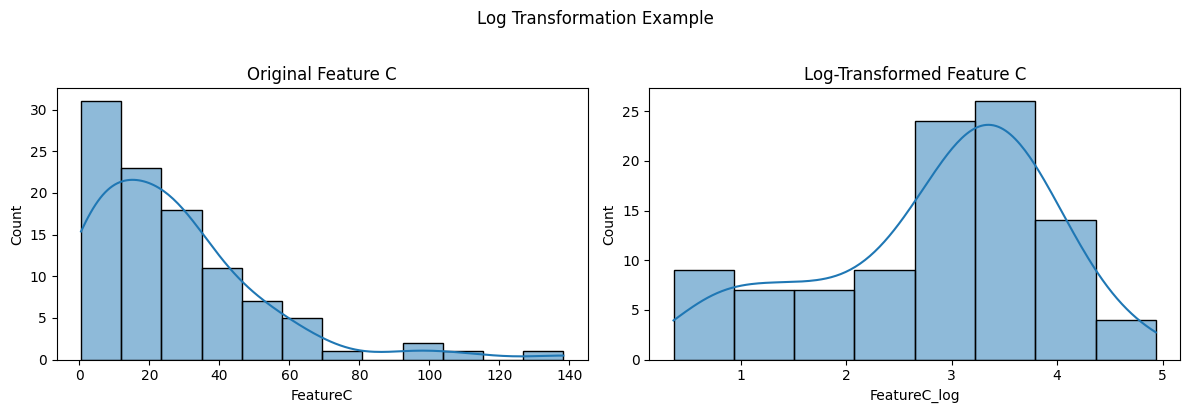

Log transform can reduce right-skewness and outlier impact.

--- c) Capping/Winsorizing ---
FeatureB - 5th percentile: 69.67, 95th percentile: 138.23

Description of FeatureB before and after capping:
         FeatureB  FeatureB_capped
count  100.000000       100.000000
mean   102.182007       100.717455
std     43.260912        19.132066
min    -60.000000        69.667239
25%     83.886790        83.886790
50%    102.728323       102.728323
75%    112.667778       112.667778
max    350.000000       138.229522


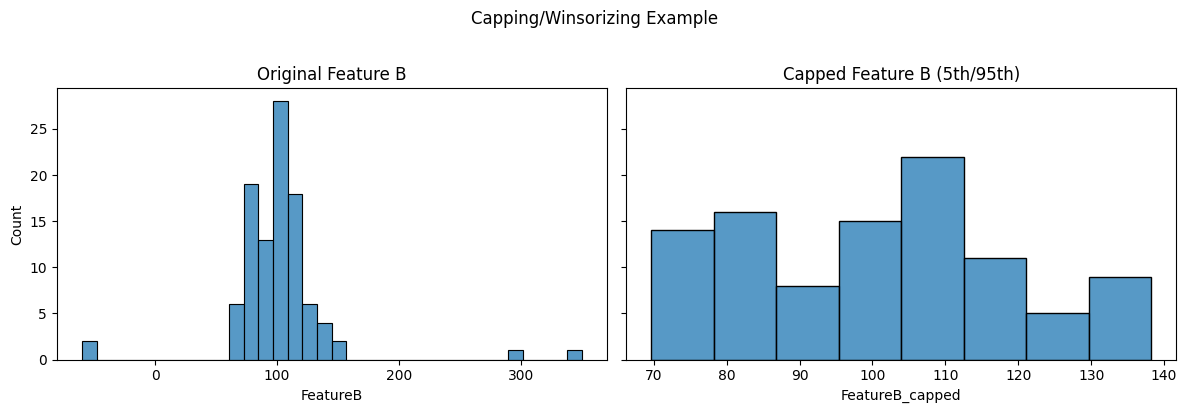

Capping limits the influence of extreme values.

--- d) Using Robust Algorithms/Scalers ---
Consider using RobustScaler or tree-based models if outliers are problematic but genuine.

--- e) Treat as Missing Data ---
Outliers can sometimes be treated as missing values and then imputed.
------------------------------
--- Final Considerations ---
- Always investigate *why* outliers exist (errors vs. genuine data).
- The best handling strategy depends on the data, the algorithm used, and the problem domain.
- Document any outlier handling steps taken.
- Be cautious about removing outliers unless you have strong justification.
------------------------------


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # For Z-score method

# --- 1. What are Outliers and Why Handle Them? ---
# - Outliers are extreme values that lie far from the central tendency of the data.
# - They can skew summary statistics (like mean, standard deviation).
# - They can disproportionately influence distance-based algorithms (KNN, K-Means)
#   and models sensitive to large errors (Linear Regression).
# - Handling them might improve model performance and robustness.
# - HOWEVER, outliers might also represent genuine, important rare events or data points.
#   Removing them blindly can discard valuable information. Always investigate outliers!

# --- 2. Create Sample Data with Outliers ---
np.random.seed(42)
data = pd.DataFrame({
    'FeatureA': np.random.normal(loc=50, scale=10, size=100), # Relatively normal
    'FeatureB': np.concatenate([np.random.normal(loc=100, scale=20, size=95),
                                np.array([300, 350, -50, -60, 105])]), # Clear outliers
    'FeatureC': np.random.exponential(scale=30, size=100) # Skewed distribution
})
# Add a very extreme value
data.loc[99, 'FeatureA'] = 200

print("--- Original Data ---")
print(data.head())
print("\nOriginal Data Description:")
print(data.describe())
print("-" * 30)


# --- 3. Identifying Outliers ---

print("--- Identifying Outliers ---")

# a) Visualization (Often the best first step)
print("\n--- a) Visualization ---")

# Box Plots: Show median, quartiles, whiskers (typically 1.5*IQR), and points beyond whiskers as outliers.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=data['FeatureA'], ax=axes[0]).set_title('Box Plot - Feature A')
sns.boxplot(y=data['FeatureB'], ax=axes[1]).set_title('Box Plot - Feature B')
sns.boxplot(y=data['FeatureC'], ax=axes[2]).set_title('Box Plot - Feature C')
plt.suptitle("Box Plots for Outlier Detection", y=1.0)
plt.tight_layout()
plt.show()
print("Generated Box Plots (points outside whiskers are potential outliers).")

# Histograms/KDE Plots: Can reveal skewness and extreme values.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['FeatureA'], kde=True, ax=axes[0]).set_title('Histogram - Feature A')
sns.histplot(data['FeatureB'], kde=True, ax=axes[1]).set_title('Histogram - Feature B')
sns.histplot(data['FeatureC'], kde=True, ax=axes[2]).set_title('Histogram - Feature C')
plt.suptitle("Histograms for Outlier Detection", y=1.0)
plt.tight_layout()
plt.show()
print("Generated Histograms.")

# Scatter Plots: Can reveal outliers in the context of relationships between variables.
# (Example assumes we have another variable to plot against)
# plt.figure(figsize=(7,5))
# sns.scatterplot(x=data['FeatureA'], y=data['FeatureB'])
# plt.title('Scatter Plot (Example)')
# plt.show()
print("-" * 20)

# b) Statistical Methods
print("\n--- b) Statistical Methods ---")

# Z-Score Method: Assumes data is normally distributed. Identifies points that
# fall outside a certain number of standard deviations (e.g., +/- 3) from the mean.
# Formula: Z = (x - mean) / std_dev
threshold_z = 3
print(f"Using Z-Score threshold: {threshold_z}")

# Calculate Z-scores for FeatureB
mean_b = data['FeatureB'].mean()
std_b = data['FeatureB'].std()
data['Z_Score_B'] = (data['FeatureB'] - mean_b) / std_b
outliers_z = data[np.abs(data['Z_Score_B']) > threshold_z]
print(f"\nOutliers in FeatureB based on Z-Score > {threshold_z}:\n", outliers_z[['FeatureB', 'Z_Score_B']])

# IQR (Interquartile Range) Method: Less sensitive to extreme values than Z-score.
# Defines outliers as points falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
# Q1 = 25th percentile, Q3 = 75th percentile, IQR = Q3 - Q1
print(f"\nUsing IQR Method (1.5 * IQR rule)")
# Calculate for FeatureB
Q1_b = data['FeatureB'].quantile(0.25)
Q3_b = data['FeatureB'].quantile(0.75)
IQR_b = Q3_b - Q1_b
lower_bound_b = Q1_b - 1.5 * IQR_b
upper_bound_b = Q3_b + 1.5 * IQR_b

print(f"FeatureB - Q1: {Q1_b:.2f}, Q3: {Q3_b:.2f}, IQR: {IQR_b:.2f}")
print(f"FeatureB - Lower Bound: {lower_bound_b:.2f}, Upper Bound: {upper_bound_b:.2f}")

outliers_iqr = data[(data['FeatureB'] < lower_bound_b) | (data['FeatureB'] > upper_bound_b)]
print(f"\nOutliers in FeatureB based on IQR method:\n", outliers_iqr[['FeatureB']])
print("-" * 30)


# --- 4. Handling Strategies ---
# Choice depends on the cause of the outlier and the goals of the analysis.

print("--- Handling Strategies ---")
df_handle = data.drop(columns=['Z_Score_B']).copy() # Use a copy

# a) Removal: Delete rows containing outliers.
# Simplest but can lead to data loss. Justified if outliers are clearly errors.
print("\n--- a) Removal ---")
# Remove outliers identified by IQR method in FeatureB
df_removed = df_handle[~((df_handle['FeatureB'] < lower_bound_b) | (df_handle['FeatureB'] > upper_bound_b))]
print(f"Shape before removing FeatureB outliers: {df_handle.shape}")
print(f"Shape after removing FeatureB outliers: {df_removed.shape}")
# print("DataFrame after removing FeatureB outliers:\n", df_removed.describe())

# b) Transformation: Apply non-linear functions (log, sqrt, Box-Cox)
# Can reduce skewness and the impact of high-value outliers. Primarily for right-skewed data.
print("\n--- b) Transformation (Log) ---")
# Log transform requires positive values. Add constant if zeros/negatives exist.
# Apply log transform to skewed FeatureC (assuming it's positive)
df_handle['FeatureC_log'] = np.log1p(df_handle['FeatureC']) # log1p handles zeros (log(1+x))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_handle['FeatureC'], kde=True, ax=axes[0]).set_title('Original Feature C')
sns.histplot(df_handle['FeatureC_log'], kde=True, ax=axes[1]).set_title('Log-Transformed Feature C')
plt.suptitle("Log Transformation Example", y=1.02)
plt.tight_layout()
plt.show()
print("Log transform can reduce right-skewness and outlier impact.")
# Note: Box-Cox transformation (from scipy.stats) is more general but requires positive data.

# c) Capping/Winsorizing: Limit extreme values.
# Replace values below/above certain percentiles with the value at that percentile.
print("\n--- c) Capping/Winsorizing ---")
lower_percentile = 0.05 # Cap at 5th percentile
upper_percentile = 0.95 # Cap at 95th percentile

# Calculate percentiles for FeatureB
lower_cap_b = df_handle['FeatureB'].quantile(lower_percentile)
upper_cap_b = df_handle['FeatureB'].quantile(upper_percentile)
print(f"FeatureB - 5th percentile: {lower_cap_b:.2f}, 95th percentile: {upper_cap_b:.2f}")

# Apply capping using np.clip or pd.clip
df_handle['FeatureB_capped'] = df_handle['FeatureB'].clip(lower=lower_cap_b, upper=upper_cap_b)

print("\nDescription of FeatureB before and after capping:")
print(df_handle[['FeatureB', 'FeatureB_capped']].describe())

# Visualize effect of capping
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
sns.histplot(df_handle['FeatureB'], kde=False, ax=axes[0]).set_title('Original Feature B')
sns.histplot(df_handle['FeatureB_capped'], kde=False, ax=axes[1]).set_title('Capped Feature B (5th/95th)')
plt.suptitle("Capping/Winsorizing Example", y=1.02)
plt.tight_layout()
plt.show()
print("Capping limits the influence of extreme values.")

# d) Using Robust Algorithms/Scalers
# Some models or preprocessing steps are inherently less sensitive to outliers.
# - Use RobustScaler instead of StandardScaler/MinMaxScaler.
# - Use models like Decision Trees, Random Forests (less sensitive).
# - Use regression models with robust loss functions (e.g., HuberRegressor - not shown here).
print("\n--- d) Using Robust Algorithms/Scalers ---")
print("Consider using RobustScaler or tree-based models if outliers are problematic but genuine.")

# e) Treat as Missing Data
# If outliers are likely errors or cannot be reliably handled, treat them as NaN
# and use imputation techniques (from Section II).
print("\n--- e) Treat as Missing Data ---")
# Example: Replace outliers in FeatureB with NaN
# df_handle.loc[(df_handle['FeatureB'] < lower_bound_b) | (df_handle['FeatureB'] > upper_bound_b), 'FeatureB'] = np.nan
# Then apply imputation:
# imputer = SimpleImputer(strategy='median')
# df_handle['FeatureB'] = imputer.fit_transform(df_handle[['FeatureB']])
print("Outliers can sometimes be treated as missing values and then imputed.")
print("-" * 30)


# --- 5. Final Considerations ---
print("--- Final Considerations ---")
print("- Always investigate *why* outliers exist (errors vs. genuine data).")
print("- The best handling strategy depends on the data, the algorithm used, and the problem domain.")
print("- Document any outlier handling steps taken.")
print("- Be cautious about removing outliers unless you have strong justification.")
print("-" * 30)